# 1-1: 
a vector of 1s and 0s was made (1s being the faulty elections), then a sample of size 40 was taken from it(this process was repeated 150 times), this shows that the number of fake elections in a sample of 40 is going to be around 7-10.

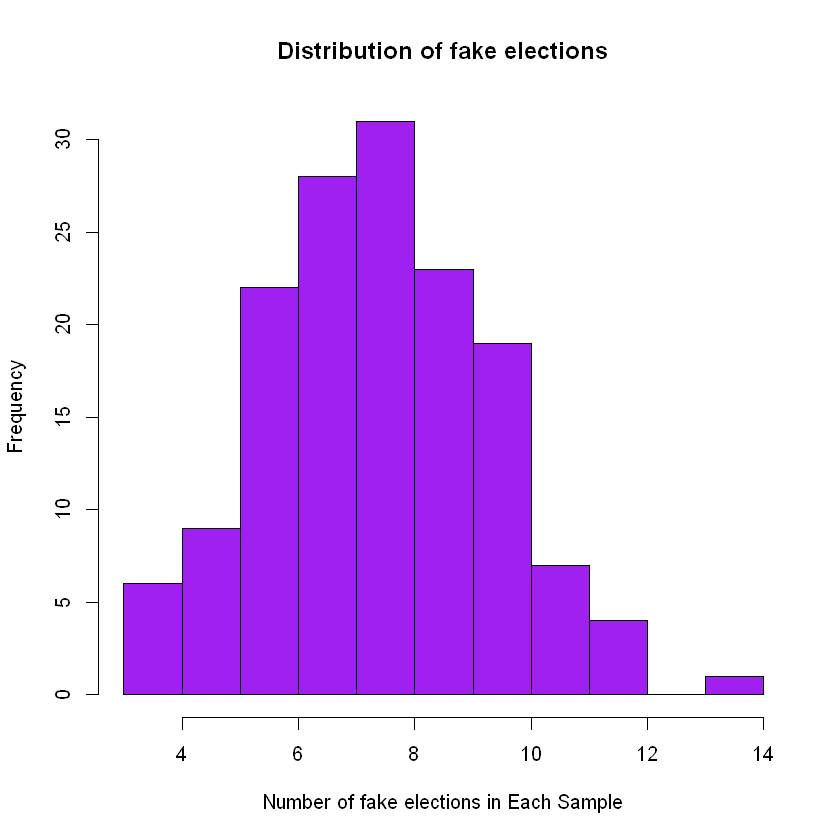

In [1]:
par(bg = "white")
set.seed(552)


N <- 100
K <- 20
m <- 40
n <- 150
results= rhyper(n, K, N - K, m)
hist(results, main = "Distribution of fake elections",
     xlab = "Number of fake elections in Each Sample",
     ylab = "Frequency",
     col = "purple")



# 1-2 & 1-3:
for different number of N we simulate the elections also with formulas related to hyper geometric distribution we find theoretical E and var (which are the same for every N), the graph shows the as N increases the practical value (which we found from simulating) gets closer to theoretical value

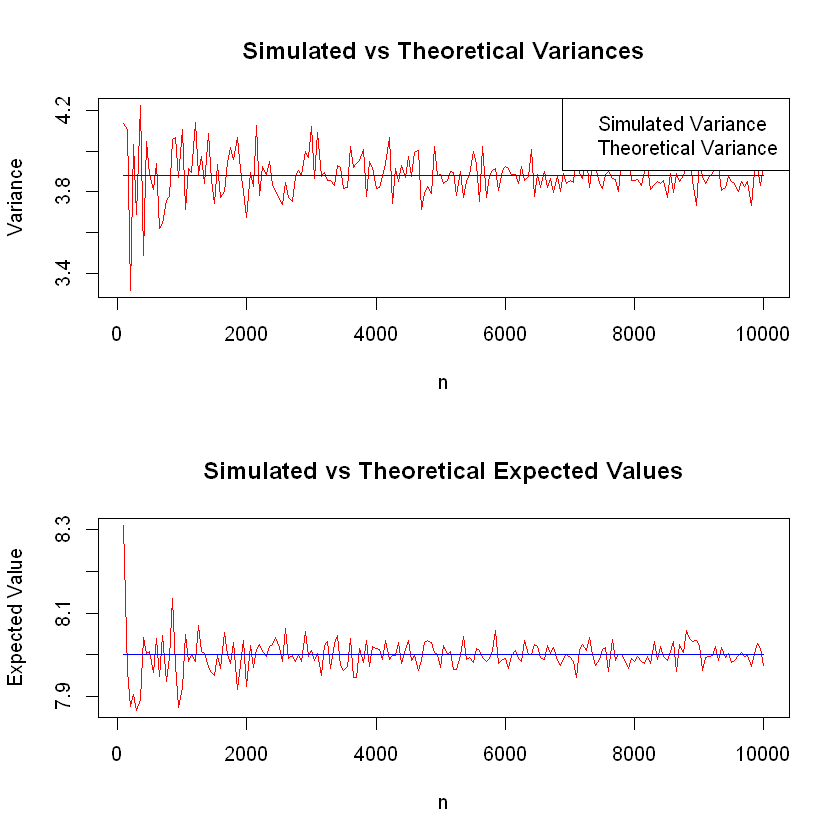

In [2]:



N <- 100
k <- 20
m <- 40
set.seed(552)
par(bg = "white")

comb <- function(n, x) {
  return (factorial(n) / (factorial(n - x) * factorial(x)))
}


hyper_geo_prob <- function(x, K, N, n) {
  comb(K, x) * comb(N - K, n - x) / comb(N, n)
}


theoretical_var <- function(K, N, n) {
  p <- K / N
  q <- 1 - p
  return (n * p * q * (N - n) / (N - 1))
}


theoretical_E <- function(K, N, n) {
  return (n * K / N)
}


vote <- function(n) {
  voting_places <- c(rep(0, 80), rep(1, 20))
  replicate(n, sample(voting_places, size <- m, replace <- FALSE))
}


simulate <- function() {
  variances <- numeric()
  expected_values <- numeric()
  theoretical_means <- numeric()
  theoretical_vars <- numeric()
  
  for (n in seq(100, 10000, 50)) {
    samples <- vote(n)
    colsums <- colSums(samples)
    
    E_simulated <- mean(colsums)
    var_simulated <- var(colsums)
    E_theoretical <- theoretical_E(k, N, m)
    var_theoretical <- theoretical_var(k, N, m)
    variances <- append(variances, var_simulated)
    expected_values <- append(expected_values, E_simulated)
    theoretical_means <- append(theoretical_means, E_theoretical)
    theoretical_vars <- append(theoretical_vars, var_theoretical)
  }
  return(list(expected_values = expected_values, variances = variances, 
              theoretical_means = theoretical_means, theoretical_vars = theoretical_vars))
}

results <- simulate()
expected_values = results$expected_values
variances = results$variances
theoretical_means = results$theoretical_means
theoretical_vars = results$theoretical_vars
n_values = seq(100, 10000, by = 50)

par(mfrow = c(2, 1))
plot(n_values, variances, col = "red", type = "l",
     main = "Simulated vs Theoretical Variances",
     xlab = "n", ylab = "Variance")
lines(n_values, theoretical_vars, col = "blue")
legend("topright", legend = c("Simulated Variance", "Theoretical Variance"), 
       col = c("red", "blue"))


plot(n_values, expected_values,
    col = "red", type = "l",
    main = "Simulated vs Theoretical Expected Values",
    xlab = "n", ylab = "Expected Value")
lines(n_values, theoretical_means, col = "blue")



# 1-4:
when m increases the number of wrong elections in our sample also increases(so there is higher chance our sample a corrupted)

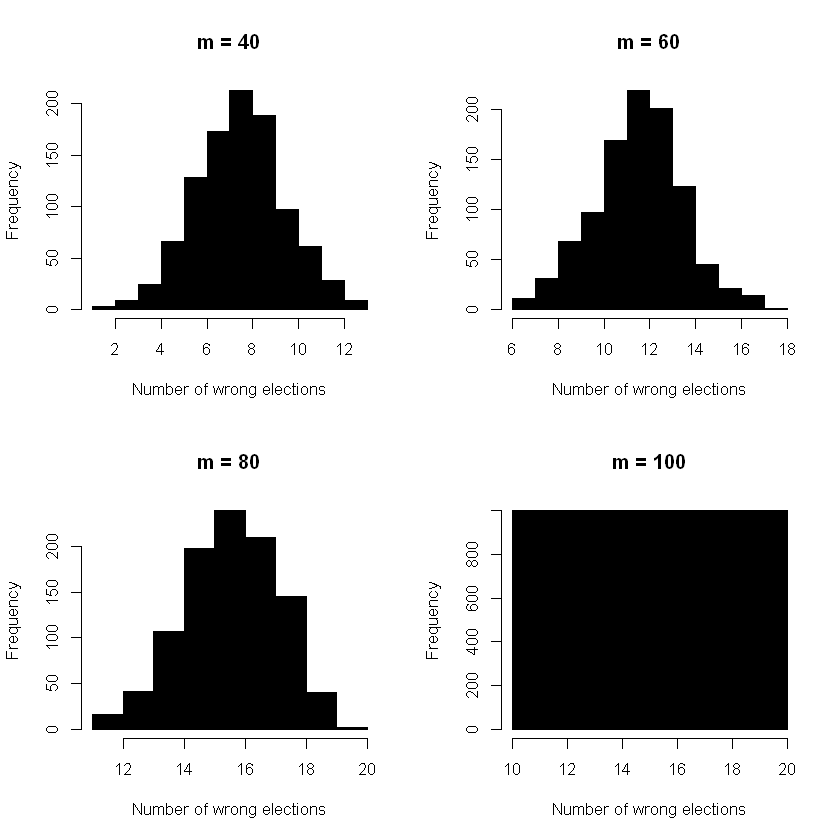

In [3]:
N <- 100
k <- 20
set.seed(552)
par(bg = "white")
vote <- function(m) {
    voting_places <- c(rep(0, 80), rep(1, 20))
    replicated_sample <- replicate(1000, sample(voting_places, size = m, replace = FALSE))
    return(replicated_sample)
}

simulate <- function() {
    par(mfrow = c(2, 2)) 
    for (m in seq(40, 100, by = 20)) {
        samples <- vote(m)
        colsums <- colSums(samples)
        

        hist(colsums, main = paste("m =", m),
             xlab = "Number of wrong elections", col = "968545")
    }
}

simulate()


# 1-5:
functions for calculating hyper geo and bin probabilty and giving x to them(x ranging from 0 to 20)<br/>
Bin(n, k) = C(n, x) * (p ^ x) * ((1 - p) ^ (n - x))

In [4]:
N <- 100
k <- 20
m <- 40


comb <- function(n, x) {
  return(factorial(n) / (factorial(x) * factorial(n - x)))
}


hyper_geo_prob <- function(x, K, N, n) {
  comb(K, x) * comb(N - K, n - x) / comb(N, n)
}


bin <- function(x, n, p) {
  return(comb(n, x) * (p^x) * (1 - p)^(n - x))
}


bin_results <- numeric(20)
hyper_geo_results <- numeric(20)


for (x in seq(1, 20, by = 1)) {
  hyper_geo_results[x] <- hyper_geo_prob(x, k, N, m)
  bin_results[x] <- bin(x, m, k / N)
}


print("Hypergeometric Results:")
print(hyper_geo_results)

print("Binomial Results:")
print(bin_results)


[1] "Hypergeometric Results:"
 [1] 1.526019e-04 1.346167e-03 7.137815e-03 2.550958e-02 6.530452e-02
 [6] 1.242206e-01 1.797234e-01 2.007847e-01 1.748329e-01 1.192361e-01
[11] 6.376259e-02 2.666993e-02 8.670631e-03 2.167658e-03 4.098844e-04
[16] 5.718253e-05 5.665142e-06 3.744203e-07 1.469625e-08 2.571843e-10
[1] "Binomial Results:"
 [1] 1.329228e-03 6.479986e-03 2.051996e-02 4.745240e-02 8.541432e-02
 [6] 1.245626e-01 1.512545e-01 1.559812e-01 1.386500e-01 1.074537e-01
[11] 7.326391e-02 4.426361e-02 2.383425e-02 1.149152e-02 4.979657e-03
[16] 1.945178e-03 6.865335e-04 2.193093e-04 6.348428e-05 1.666462e-05


# 1-6:
this shows as the size of election places increases hyper geo becomes similar to bin dstribution because with large N if we remove an element from our list it wont have a huge effect compared to smaller N values

 [1] 1.329228e-03 6.479986e-03 2.051996e-02 4.745240e-02 8.541432e-02
 [6] 1.245626e-01 1.512545e-01 1.559812e-01 1.386500e-01 1.074537e-01
[11] 7.326391e-02 4.426361e-02 2.383425e-02 1.149152e-02 4.979657e-03
[16] 1.945178e-03 6.865335e-04 2.193093e-04 6.348428e-05 1.666462e-05
 [1] 3.256103e-01 2.645583e-01 1.396280e-01 5.381496e-02 1.614449e-02
 [6] 3.924008e-03 7.941444e-04 1.364936e-04 2.022127e-05 2.611914e-06
[11] 2.968084e-07 2.988696e-08 2.682163e-09 2.155309e-10 1.556612e-11
[16] 1.013420e-12 5.961291e-14 3.173836e-15 1.531236e-16 6.699160e-18
 [1] 3.638371e-01 1.447923e-01 3.742930e-02 7.065736e-03 1.038231e-03
 [6] 1.235989e-04 1.225178e-05 1.031400e-06 7.484083e-08 4.734828e-09
[11] 2.635340e-10 1.299743e-11 5.713154e-13 2.248618e-14 7.954293e-16
[16] 2.536446e-17 7.307886e-19 1.905685e-20 4.503229e-22 9.649777e-24
 [1] 7.399137e-02 2.891447e-03 7.339677e-05 1.360561e-06 1.963135e-08
 [6] 2.294914e-10 2.233812e-12 1.846588e-14 1.315761e-16 8.174066e-19
[11] 4.467517e-21 2.

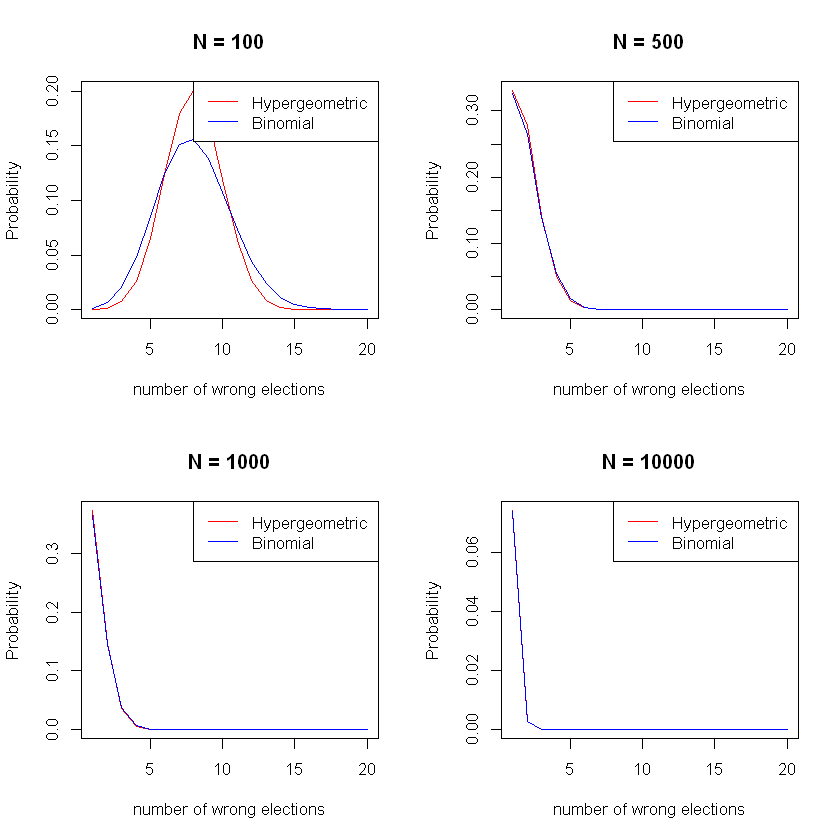

In [5]:

k = 20 
m = 40
n_values = c(100, 500, 1000, 10000)




hyper_geo_prob <- function(x, K, N, n) {
  choose(K, x) * choose(N - K, n - x) / choose(N, n)
}


bin <- function(x, n, p) {
  choose(n, x) * (p^x) * (1 - p)^(n - x)
}




par(mfrow = c(2, 2),bg="white")

for (n in n_values) {
  hyper_geo_results = numeric(20)
  bin_results = numeric(20)
  
  
  for (x in seq(1, 20, by = 1)) {
    hyper_geo_results[x] = hyper_geo_prob(x, k, n, m)
    p = k / n
    bin_results[x] = bin(x, m, p)
  }
  x_values = seq(1, 20, by=1)
  print(bin_results)
  plot(x_values, hyper_geo_results, col = "red",type="l",
       xlab = "number of wrong elections", ylab = "Probability",
       main = paste("N =", n))
  lines(x_values, bin_results, type = "l", col = "blue")
  legend("topright", legend = c("Hypergeometric", "Binomial"), col = c("red", "blue"),lty=1)
}

# 1-7:
from graphs above it can be understood that as sample size increases the similarity between hypo geo and Bin also increases

# 2-1: 
cdf was caculated by adding each bin result to all previous bin results

In [6]:
n <- 1000     
p <- 0.45         
k_max <- 430          

bin <- function(x, n, p) {
  choose(n, x) * (p^x) * (1 - p)^(n - x)
}

bin_results=numeric(k_max)
bin_results[1]=bin(1,n,p)
for (k in seq(2, k_max, by = 1)) {
    bin_results[k] = bin_results[k-1]+bin(k, n, p)
  }

print(bin_results[430])



[1] 0.1074638


# 2-2:
graph shows that it is possible to approximate a binomial distribution to a normal distribution(especially useful for large datasets)

In [7]:
n <- 1000     
p <- 0.45         
k<- 430
par(bg="white")
mean = n*p
var = n*p*(1-p)
sd = sqrt(var)
k_values <- seq(1, k_max, by=1)

normal_result<- pnorm(k, mean = mean, sd = sd)
error = abs(normal_result-bin_results[k])
cat("CDF using Normal dist without continuity correction:")
normal_result
cat("Error:")
error

CDF using Normal dist without continuity correction:

[1] 0.1018139

Error:

[1] 0.005649884

# 2-3:
following graph shows that by adding continuity correction to normal distribution error is reduced by a significant amount.

In [8]:
normal_continuity<- pnorm(k+0.5, mean = mean, sd = sd)
error = abs(normal_continuity-bin_results[k])
cat("CDF using Normal dist without continuity correction")
normal_continuity
cat("Error:")
error

CDF using Normal dist without continuity correction

[1] 0.1075799

Error:

[1] 0.0001161443

# 2-4:
graphs show that using continuity correction reduces error for different values of X.

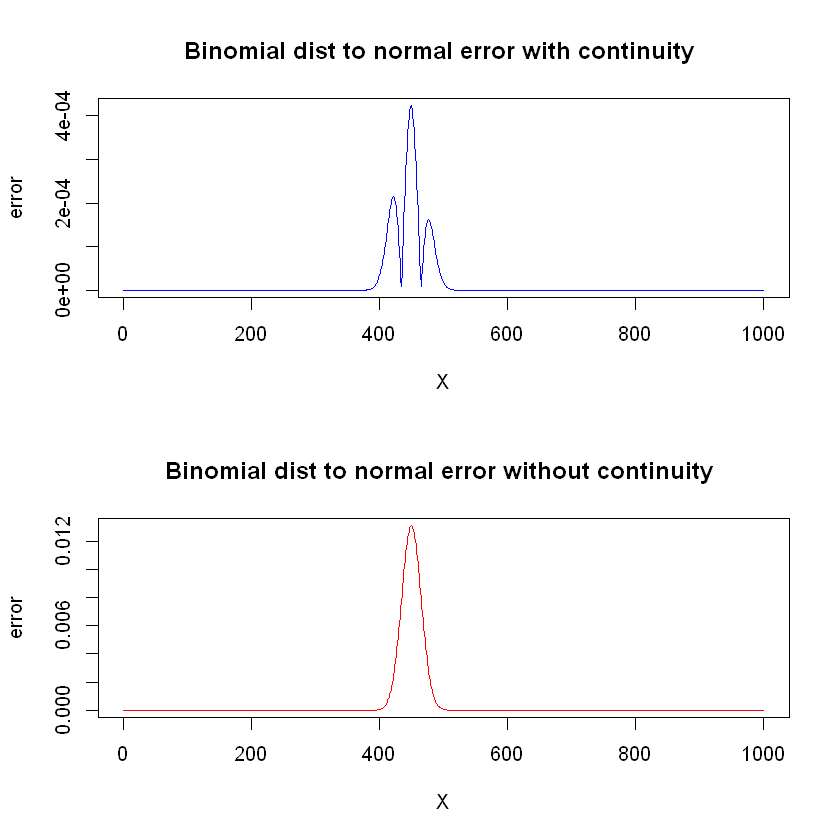

In [9]:

n <- 1000     
p <- 0.45         
X_max <- 1000
par(mfrow = c(2, 1),bg="white")
mean = n*p
var = n*p*(1-p)
sd = sqrt(var)
X_values <- seq(1, X_max, by=1)



normal_results <- pnorm(X_values, mean = mean, sd = sd)




Normal_continuity <- pnorm(X_values+0.5, mean = mean, sd = sd)




bin_results=numeric(X_max)
bin_results[1]=bin(1,n,p)
for (k in seq(2, X_max, by = 1)) {
    bin_results[k] = bin_results[k-1]+bin(k, n, p)
  }




bin_norm_error_with_con = abs(bin_results-Normal_continuity)
bin_norm_error_without_con = abs(bin_results-normal_results)

plot(X_values, bin_norm_error_with_con, type="l", col="blue", main="Binomial dist to normal error with continuity ", xlab="X", ylab="error")


plot(X_values, bin_norm_error_without_con, type="l", col="red", main="Binomial dist to normal error without continuity ", xlab="X", ylab="error")

# 2-5:
by adding continuity correction the result is shifted to the left which causes the normal line to get closer to the   bin line  which results  in amore accurate probablity


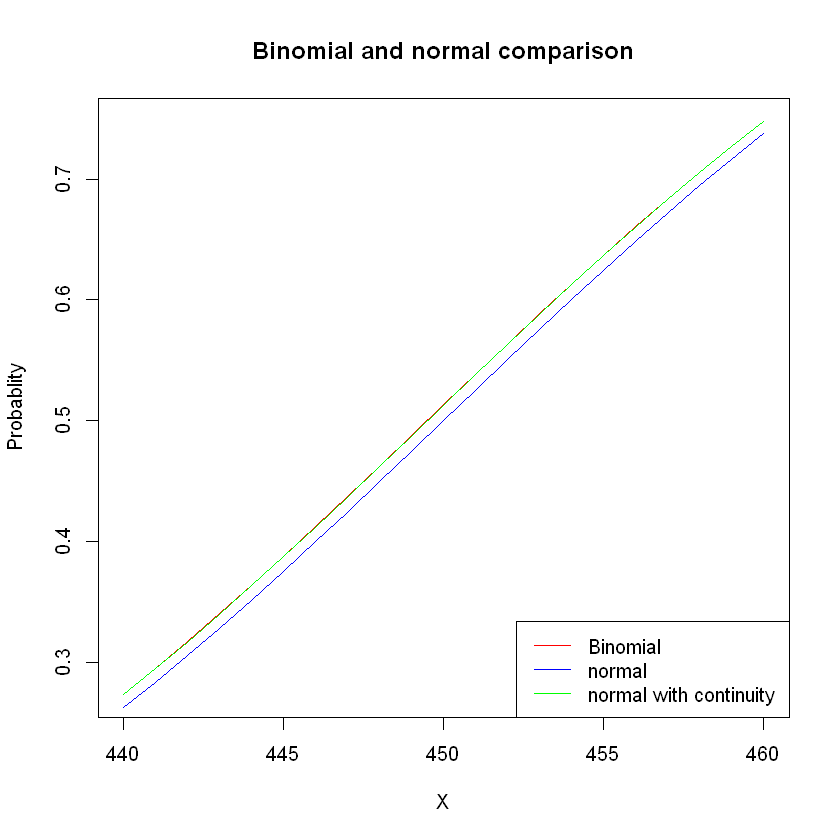

In [10]:

n <- 1000
p <- 0.45
X_min <- 440
X_max <- 460
mean <- n * p
var <- n * p * (1 - p)
sd <- sqrt(var)


X_values <- seq(X_min, X_max, by = 1)

normal_results<- pnorm(X_values, mean = mean, sd = sd)

Normal_with_con <- pnorm(X_values + 0.5, mean = mean, sd = sd)

bin_results=numeric(X_max)
bin_results[1]=bin(1,n,p)
for (k in seq(2, X_max, by = 1)) {
    bin_results[k] = bin_results[k-1]+bin(k, n, p)
  }

par(bg = "white")

plot(X_values, bin_results[X_min:X_max],type="l", col="red", 
     main="Binomial and normal comparison", 
     xlab="X", ylab="Probablity")
lines(X_values, normal_results, col="blue")
lines(X_values, Normal_with_con, col="green")
legend("bottomright", legend=c("Binomial", "normal", "normal with continuity"), 
       col=c("red", "blue", "green"),lty=1)



# 2-6:
graph shows as X increases the time it takes to calculate binomial cdf increases(because each needs the resuls of previous Xs but for normal distro there is a formula and no need to calculte previous values of X) 

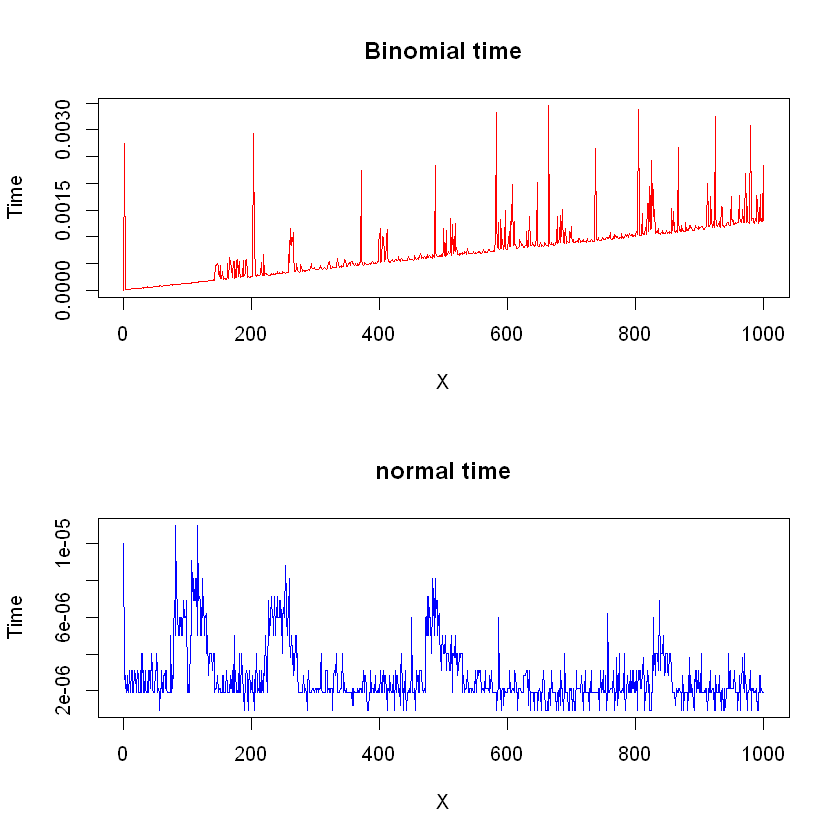

In [11]:

n <- 1000
p <- 0.45
X_max <- 1000
mean <- n * p
var <- n * p * (1 - p)
sd <- sqrt(var)


X_values <- seq(1, X_max, by = 1)




bin_CDF <- function(X_max){
  bin_results=numeric(X_max)
  bin_results[1]=bin(1,n,p)
  for (X in seq(2, X_max, by = 1)) {
    bin_results[X] = bin_results[X-1]+bin(X, n, p)
  }
  return(bin_results[X_max])
}

bin_time=numeric(X_max-X_min)
bin_results=numeric(X_max)
bin_results[1]=bin(1,n,p)

for (X in seq(2, X_max, by = 1)) {
    start.time <- Sys.time()
    bin_results[X]=bin_CDF(X)
    end.time <- Sys.time()
    time.taken <- end.time - start.time
    bin_time[X] <- time.taken
    
  }




  
normal_time=numeric(X_max-X_min)

for (X in seq(1,X_max, by = 1)) {

  start.time <- Sys.time()

  y_normal <- pnorm(X+ 0.5, mean = mean, sd = sd)
  end.time <- Sys.time()
  time.taken <- end.time - start.time
  normal_time[X] <- time.taken
  }



par(mfrow = c(2, 1), bg = "white")
plot(X_values, bin_time, type="l", col="red", 
     main="Binomial time", 
     xlab="X", ylab="Time")
plot(X_values, normal_time, col="blue",main="normal time", 
     xlab="X", ylab="Time",type="l")



# 2-7:
 around X=520 it is better to switch to Normal dist to calculate the cdf because the cost of time spent becomes larger than the cost of error.

In [12]:

n <- 1000
p <- 0.45
X_min <- 400
X_max <- 600
mean <- n * p
var <- n * p * (1 - p)
sd <- sqrt(var)


X_values <- seq(X_min, X_max, by = 1)


bin_time=numeric(X_max-X_min)
bin_results=numeric(X_max)
bin_results[1]=bin(1,n,p)
start.time <- Sys.time()
for (X in seq(2, X_max, by = 1)) {
    
    bin_results[X] = bin_results[X-1]+bin(X, n, p)
    end.time <- Sys.time()
    time.taken <- end.time - start.time
    bin_time[X] <- time.taken
  }






Normal_results <- pnorm(X_values, mean = mean, sd = sd)
normal_time=numeric(X_max-X_min)
for (X in seq(X_min, X_max, by = 1)) {

  start.time <- Sys.time()

  y_normal <- pnorm(X+ 0.5, mean = mean, sd = sd)
  end.time <- Sys.time()
  time.taken <- end.time - start.time
  normal_time[X-X_min+1] <- time.taken
  }




error= abs(bin_results[X_min:X_max]-Normal_results)
error_cost = error * 10**6
time=bin_time[X_min:X_max]-normal_time
time_cost = time*100


optimal_X <- function(error_cost,time_cost) {
  for (i in 1:length(error_cost)) {
     if (error_cost[i]<time_cost[i]) {
        return( i+400)
     }
  }
}

optimal_X(error_cost,time_cost)

[1] 518

# 2-8: 
from 400 to about 520 it is better to use bin

Cost Difference at X = 430: 1.240897 
At X = 430, the binomial method is better.


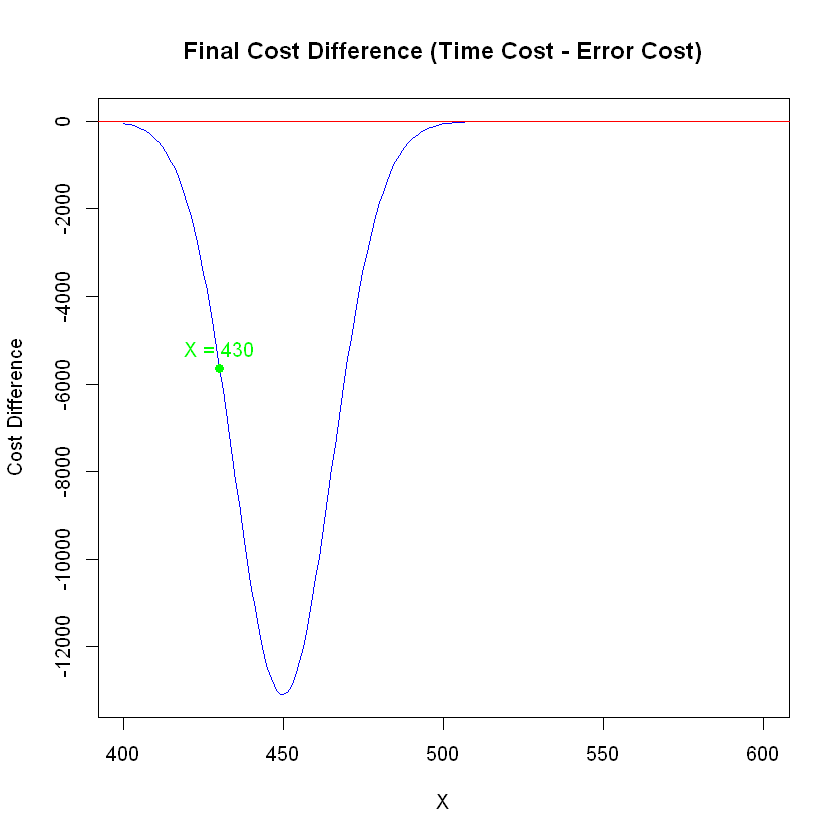

In [13]:
cost_difference <- time_cost - error_cost
par(bg = "white")
plot(
  X_values, cost_difference, type = "l", col = "blue",
  main = "Final Cost Difference (Time Cost - Error Cost)",
  xlab = "X", ylab = "Cost Difference"
)
abline(h = 0, col = "red", lty = 1)
points(430, cost_difference[430 - X_min + 1], col = "green", pch = 19)
text(430, cost_difference[430 - X_min + 1], labels = "X = 430", pos = 3, col = "green")


cat("Cost Difference at X = 430:", cost_difference[600 - X_min + 1], "\n")
if (cost_difference[430 - X_min + 1] > 0) {
  cat("At X = 430, the normal method is better.\n")
} else {
  cat("At X = 430, the binomial method is better.\n")
}


# 3-1:

In [14]:
lambda= 1/15
reduce_time=12

simulate_exponential <- function(lambda, m) {
  rexp(m, rate = lambda)
}
simulated_times= simulate_exponential(lambda,10000)



# 3-2:
remove arrival times larger than 12

In [15]:
filter_simulation <- function(simulated_times,reduce_time,max_time){
    filtered_time=numeric()
    for (time in simulated_times){
        if(time>reduce_time && time<max_time)
            filtered_time <- append(filtered_time, time)
    }
    return(filtered_time)
}

# 3-3:
we can see that both original and filtered times look alike also as m increases they become more similiar

For m = 1000 
	Original mean: 14.958 
	Mean after applying filter: 27.56266 
For m = 10000 
	Original mean: 14.9854 
	Mean after applying filter: 27.1171 
For m = 1e+05 
	Original mean: 14.9581 
	Mean after applying filter: 26.99374 


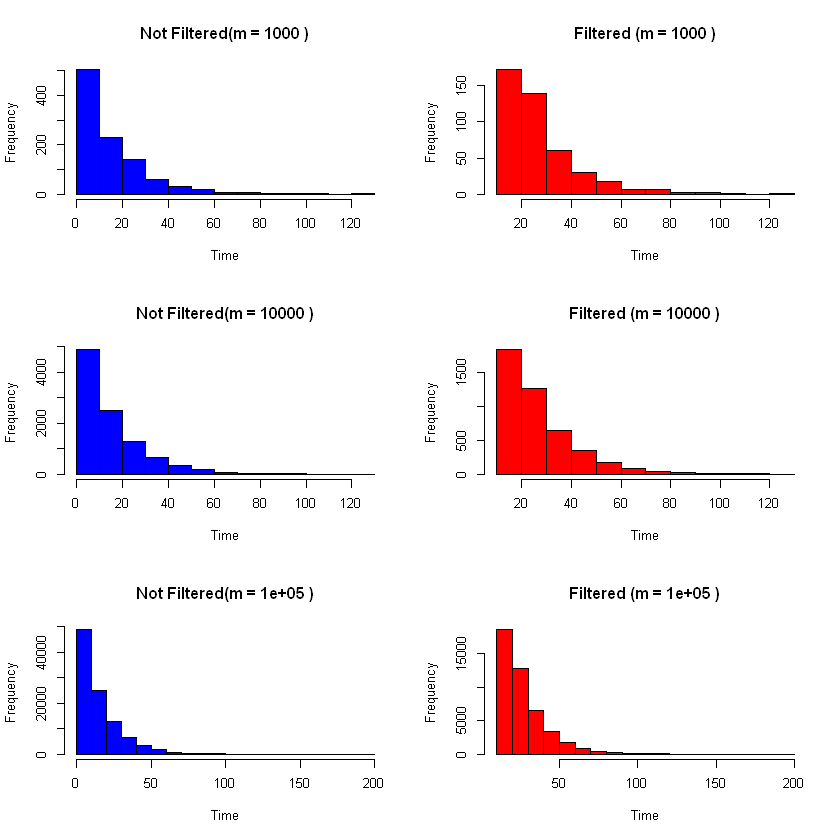

In [16]:
par(mfrow = c(3, 2),bg="white")
m_values = c(1000,10000,100000)
for (m in m_values) {
    simulated_times <- simulate_exponential(lambda, m)
    filtered_times <- filter_simulation(simulated_times,reduce_time,480)
    mean_original <- mean(simulated_times)
    mean_filtered <- mean(filtered_times)

    hist(simulated_times, main = paste("Not Filtered(m =", m, ")"), col = "blue", xlab = "Time")
    hist(filtered_times, main = paste("Filtered (m =", m, ")"), col = "red", xlab = "Time")
    cat("For m =", m, "\n\tOriginal mean:", mean_original, "\n\tMean after applying filter:", mean_filtered, "\n")
  }

# 3-4:
we can see that if some times passes and we dont get any customers we cant coclude that a customer will come soon, this is because expo dist is a memoryless distribution.

# 3-5: 
probabilty of P(X<15 | X>12) is calculated using simulations and with formula


In [17]:
    simulated_times <- simulate_exponential(lambda, 1000)
    filtered_times <- filter_simulation(simulated_times,12,480)
    simulated_prob= length(filtered_times[filtered_times<15])/length(filtered_times)
    cat("Probability from simulated results:")
    simulated_prob
    theoradical_prob = pexp(3, lambda )
    cat("Probability using formula:")
    theoradical_prob

Probability from simulated results:

[1] 0.1704036

Probability using formula:

[1] 0.1812692

# 4-1:

In [18]:
X=runif(10**6, min = 0, max = 1)

# 4-2:

In [19]:
Y <- -2 * log(X)

# 4-3:
we can see that using logarithmic transformation is a good estimation for an exponetial distribution

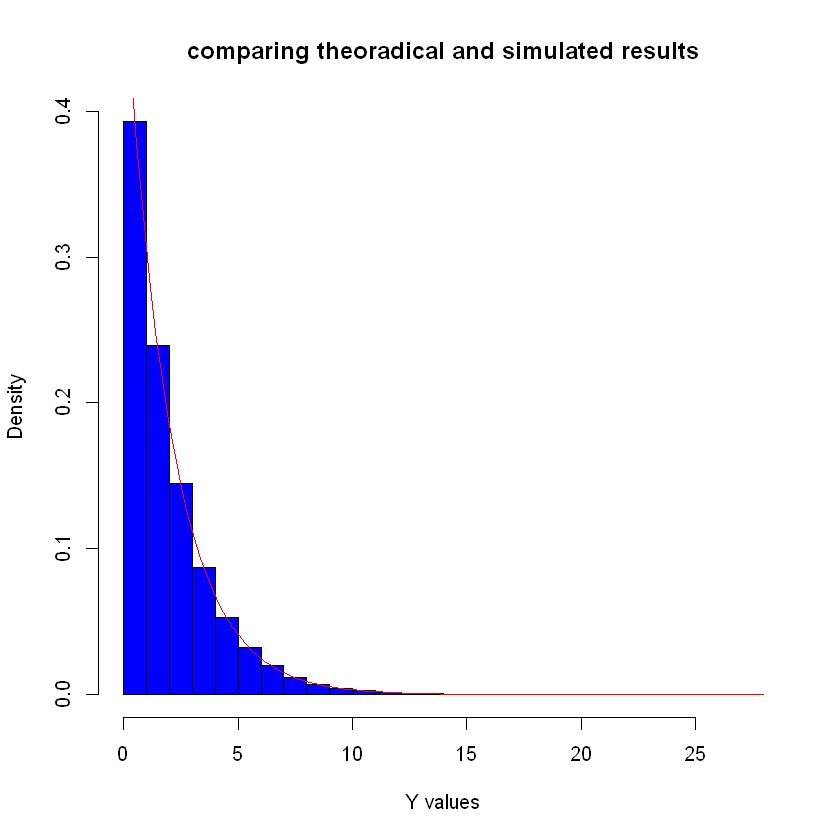

In [20]:
par(bg="white")
hist(Y, probability = TRUE, main="comparing theoradical and simulated results", xlab="Y values", col="blue")
curve(0.5 * exp(-x / 2), add = TRUE, col = "red")

# 4-4:
we can see that using box_muller transformation is a good estimation for a normal distribution

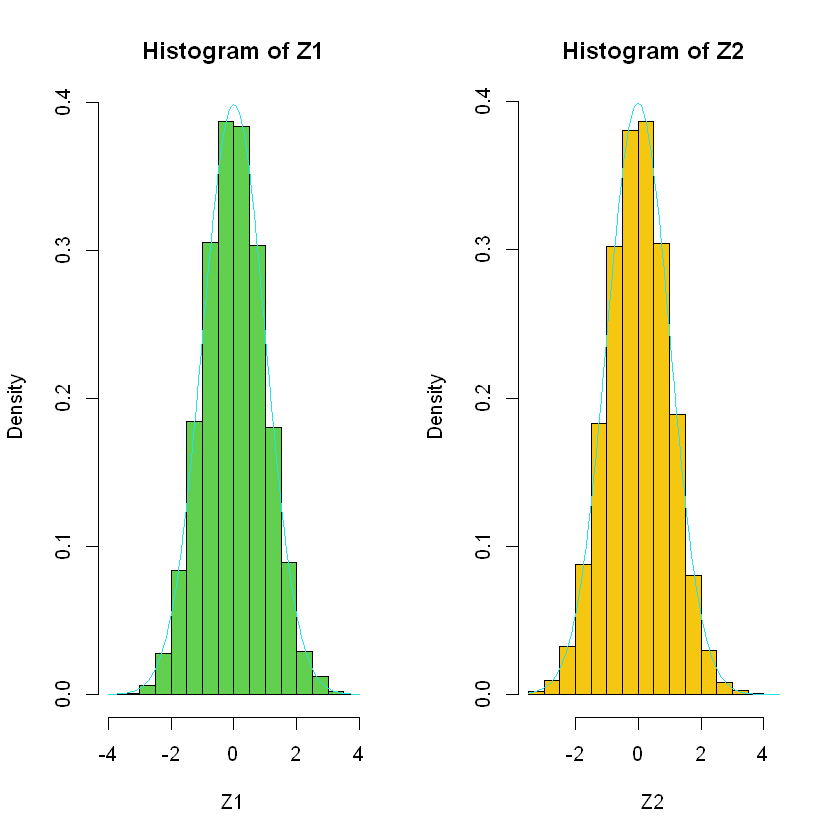

In [21]:

n <- 10000
U1 <- runif(n)
U2 <- runif(n)
R <- sqrt(-2 * log(U1))
theta <- 2 * 3.14 * U2
Z1 <- R * cos(theta)
Z2 <- R * sin(theta)
par(mfrow = c(1, 2),bg="white")
hist(Z1, probability = TRUE, col = "646747")
curve(dnorm(x), add = TRUE,col="635565")
hist(Z2, probability = TRUE, col = "145351")
curve(dnorm(x), add = TRUE,col="635565")
